# Text Recognition (Live Environment)

<h3><b>What is Text Recognition?</b></h3>
<b>Text Recognition/Optical Character Recognition</b> is the system that converts the text available in the image to a machine readable format. It is designed to read the all characters seen in the image to a machine interpretable text.
<p>This algorithm allows computers to analyze <b>printed/handwritten documents</b> automatically and prepare text data into editable formats for computers to efficiently process them.</p>

<h3>Importing the libraries</h3>

Here for the OCR <b>py-tesseract</b> is used. It will recognize and "read" the text embedded in images. It can read text from any source whether it maybe images or license plates or handwritten documents. 
<p>The other main concerned library is <b>OpenCv</b>. This library is used to enable the real time accessibility of the sources to recognize characters from. The main functionality of this tool is to enable (create environment for) the real time computer vision based applications.

In [1]:
# Loading the necessary packages
import pytesseract
import cv2
import matplotlib.pyplot as plt
import numpy as np

<p>           </p>

Enabling the <b><i>tesseract</i></b> command by adding the PATH of its executable file.

In [2]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

<h3>Testing on an image</h3>

Now let's test an image. Here imread() method of cv2 accepts path of the file as an input and reads the specified file. If complications are seen with the file such as missing file, improper permissions, unsupported or invalid format then it returns an empty matrix.

In [3]:
# Loading the image file
img = cv2.imread(r"C:\Users\Asus\Desktop\img_file.png")

# The result shows the numpy matrix of the image pixels
print(img[10])

[[255 255 255]
 [255 255 255]
 [255 255 255]
 ...
 [255 255 255]
 [255 255 255]
 [255 255 255]]


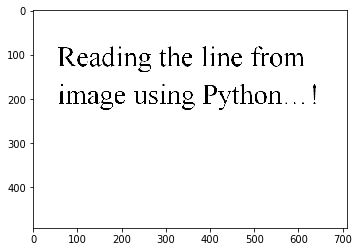

In [4]:
# Visualizing the image
plt.imshow(img)

<h3>Converting Text (Image) -> String</h3>
<p>Using the <b>image_to_string()</b> method to convert the text seen in the image file to a string type.</p>
<p>The numpy matrix of image is passed as the parameter.

In [5]:
# Transforming the characters seen in the image to string type.
img2char = pytesseract.image_to_string(img)

# The type(img2char) shows the type of the variable img2char which is "string type" as required.
type(img2char)

str

In [6]:
# The result here reads the characters (text as a whole) present in the image in string format. 
print(img2char)

Reading the line from
image using Python... !



<h3>Creating bounding boxes</h3>
<p>Now let's draw bounding boxes around each character seen in the image.</p>
<p>For this pytesseract's method named <b>image_to_boxes()</b> is used. This method encloses each and every seen character by a bounding box. So the bounding boxes seperate the characters from one another. And this method can further be used to seperate lines, paragraphs and segments in the text document/image.</p>

In [7]:
# Creating bounding boxes.
imgbox = pytesseract.image_to_boxes(img)

In [8]:
type(imgbox)

str

In [9]:
# Here the result shows the coordinating points of the bounding rectangles around every visible character.

print(imgbox)

R 56 365 98 408 0
e 100 364 124 395 0
a 113 351 142 410 0
d 128 364 155 395 0
i 156 364 202 410 0
n 205 365 236 395 0
g 238 351 267 395 0
t 284 364 302 404 0
h 303 365 334 410 0
e 336 364 360 395 0
l 381 365 394 410 0
i 399 365 412 410 0
n 415 365 446 395 0
e 448 364 472 395 0
f 493 365 533 410 0
r 535 364 563 395 0
o 554 364 583 410 0
m 566 365 613 395 0
i 58 280 71 325 0
m 74 280 121 310 0
a 124 279 151 310 0
g 152 266 181 310 0
e 184 279 208 310 0
u 228 279 257 309 0
s 262 279 282 310 0
i 287 280 300 325 0
n 303 280 334 310 0
g 336 266 365 310 0
P 383 280 416 323 0
y 411 266 434 325 0
t 418 266 466 319 0
h 467 280 498 325 0
o 483 266 512 325 0
n 500 279 528 310 0
. 531 280 562 310 0
. 569 279 574 284 0
. 588 279 612 284 0
! 633 279 638 324 0



In [10]:
# The shape() methond shows the height, width and the depth of the image loaded.
# The depth value here represents the color depthness of the image file.

imgH, imgW, _ = img.shape
img.shape

(492, 711, 3)

In [11]:
# The following code works to get the bounding boxes around the recognized charachters.

for boxes in imgbox.splitlines():
    boxes = boxes.split(" ")
    x,y,w,h = int(boxes[1]), int(boxes[2]), int(boxes[3]), int(boxes[4])
    cv2.rectangle(img, (x, imgH-y), (w, imgH-h), (0,0,255),1)

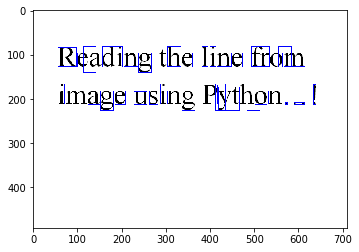

In [12]:
# Shows bounding boxes around every character.

plt.imshow(img)

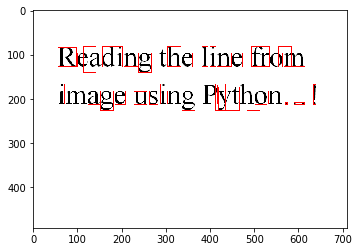

In [13]:
# Changing the color format from BGR to RGB.
# So the resulting image shows the bounding boxes of Red color.

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

<h3>Executing in real environment</h3>
<p>Now let's test this on a video file. Firstly a method of OpenCv named <b>VideoCapture()</b> is used to load the video file. This same method can also be used to load the image directly from the Webcam and run Text recognition over it. Here the path of the video file is passed as a parameter to the method.</p>

<p>Then an infinite <b>while loop</b> is initiated which continuously takes the input from the Webcam/video file unless the <b>break condition</b> is encountered.</p>

<p>At the end all the windows captured by the webcam or the image frames of the video file is removed.</p>

In [14]:
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

cap = cv2.VideoCapture(r"C:\Users\Asus\Desktop\text-input.mp4")

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

cntr = 0;
while True:
    ret, frame = cap.read()
    #print(ret)
    cntr = cntr + 1;
    
    if ((cntr%20) == 0):
        imgH, imgW, _ = frame.shape
        x1, y1, w1, h1 = 0,0,imgH,imgW
        imgchar = pytesseract.image_to_string(frame)
        imgboxes = pytesseract.image_to_boxes(frame)
        
        for boxes in imgboxes.splitlines():
            boxes = boxes.split(" ")
            x,y,w,h = int(boxes[1]), int(boxes[2]), int(boxes[3]), int(boxes[4])
            cv2.rectangle(frame, (x, imgH-y), (w, imgH-h), (0,0,255),1)
            
        cv2.putText(frame, imgchar, (x1 + int(w1/50),y1 + int(h1/50)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        font = cv2.FONT_HERSHEY_SIMPLEX
        
        cv2.imshow("Text recognition", frame)
        if cv2.waitKey(2) & 0xFF == ord("q"):
            break

cap.release()
cv2.destroyAllWindows()
        

AttributeError: 'NoneType' object has no attribute 'shape'

<h2>Conclusion:</h2>
<p>This text recognition technique from the video or any document can be used for many other applications.</p>
<p>Such as:
<p>1. To read data from big files and make a summary out of it.
<p>2. To convert the pdfs into audio files which helps us to read the research papers easily in no time.
<p>3. To read the number plates on the vehicles and utilize it further as per the need.
<p>4. To convert the handwritten documents into soft copies.
<p>And many other...